In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
x_breast,y_breast=load_breast_cancer(return_X_y=True)
x=pd.DataFrame(x_breast)
y=pd.Series(y_breast).map({0:1,1:0})

In [4]:
#Percentage
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
#Splitting the dataset into training and the testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


Grid search 

1.Lets use the Gridsearch to fingd the best hyperparameter for a supp vector classifier

In [6]:
#Set up the model
svm=SVC(random_state=0)
#determine the hyperparametr space
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
           ]

In [7]:
#Set up the search
search=GridSearchCV(svm,param_grid=param_grid,scoring='accuracy',cv=3,refit=True)
#find the best hyperparamete
search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [8]:
print(search.best_params_)

{'C': 100, 'kernel': 'linear'}


In [9]:
#we also find the data for all models evaluated
results=pd.DataFrame(search.cv_results_)
print(results.shape)
results.head()

(12, 14)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.403104,0.110366,0.001668,0.000471,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.954887,0.924812,0.946970,0.942223,0.012729,3
1,2.084681,0.844374,0.001667,0.000472,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.977444,0.917293,0.954545,0.949761,0.024788,2
2,5.047606,2.379770,0.001667,0.000471,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.977444,0.909774,0.962121,0.949780,0.028971,1
3,4.404483,0.907474,0.001334,0.000471,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.977444,0.879699,0.939394,0.932179,0.040229,5
4,0.005634,0.000451,0.004538,0.000412,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.939850,0.909774,0.901515,0.917046,0.016473,12


In [11]:
#we can order the differents models best on their performance
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results[['param_C','param_kernel','param_gamma','mean_test_score','std_test_score']].head()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
0,100,linear,NaN,0.949780,0.028971
1,10,linear,NaN,0.949761,0.024788
2,1,linear,NaN,0.942223,0.012729
3,10,rbf,0.0001,0.937116,0.020053
4,1000,linear,NaN,0.932179,0.040229


Text(0.5, 0, 'Hyperparameter space')

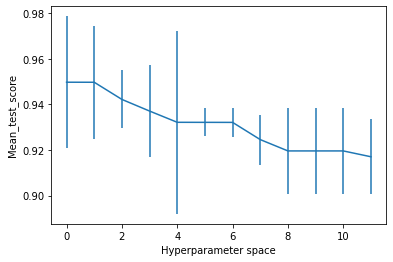

In [12]:
#Plot model performance and the errors
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']])
plt.ylabel('Mean_test_score')
plt.xlabel("Hyperparameter space")

In [14]:
#Lets predict the training and the testing accuracy
x_train_preds=search.predict(x_train)
x_test_pred=search.predict(x_test)
print("Training accuracy:",accuracy_score(y_train,x_train_preds))
print("Testing accuracy:",accuracy_score(y_test,x_test_pred))

Training accuracy: 0.9723618090452262
Testing accuracy: 0.9649122807017544
